In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler


In [2]:
%pwd

'C:\\Users\\nikun\\OneDrive\\Desktop\\Python\\Projects\\1. Credit Card Fraud Detection'

In [2]:
data = pd.read_csv("C:\\Users\\nikun\\OneDrive\\Desktop\\Python\\Projects\\1. Credit Card Fraud Detection\\creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
data_copy = data.copy()           ## Creating a copy of the dataset for any future reference

## Converting all the names to first small caps for better accessing

In [4]:
data.columns = data.columns.str.lower()
data.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Removal of any duplicate values

In [5]:
data.duplicated().value_counts()       # 1081 duplicate values

False    283726
True       1081
dtype: int64

In [31]:
1081/len(data)*100     # only 0.37% data is duplicate so removing them

0.379555277784605

In [6]:
data.drop_duplicates(keep="last",inplace=True)       # keeping the last updated duplicated value in the data

In [35]:
data.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data["hrs"]=round(data["time"]/(60*60))      # converting the time column into hour column to use better

data["dayhours"]=(data["time"]/(60*60)%24)   # converting the 2 day hour into 1 day hour split
data["dayhours"] = data["dayhours"].apply(lambda x: int(x))

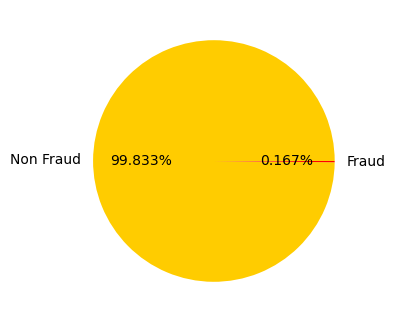

In [190]:
# Checking of Class imbalance
plt.figure(figsize=(4,4),dpi=100)
plt.pie(data["class"].value_counts(),labels=["Non Fraud","Fraud"],autopct='%1.3f%%',colors=["#ffcc00","#ff0000"])
plt.show()

In [104]:
## very high imbalance in the dataset with very little data for Fraud transactions 

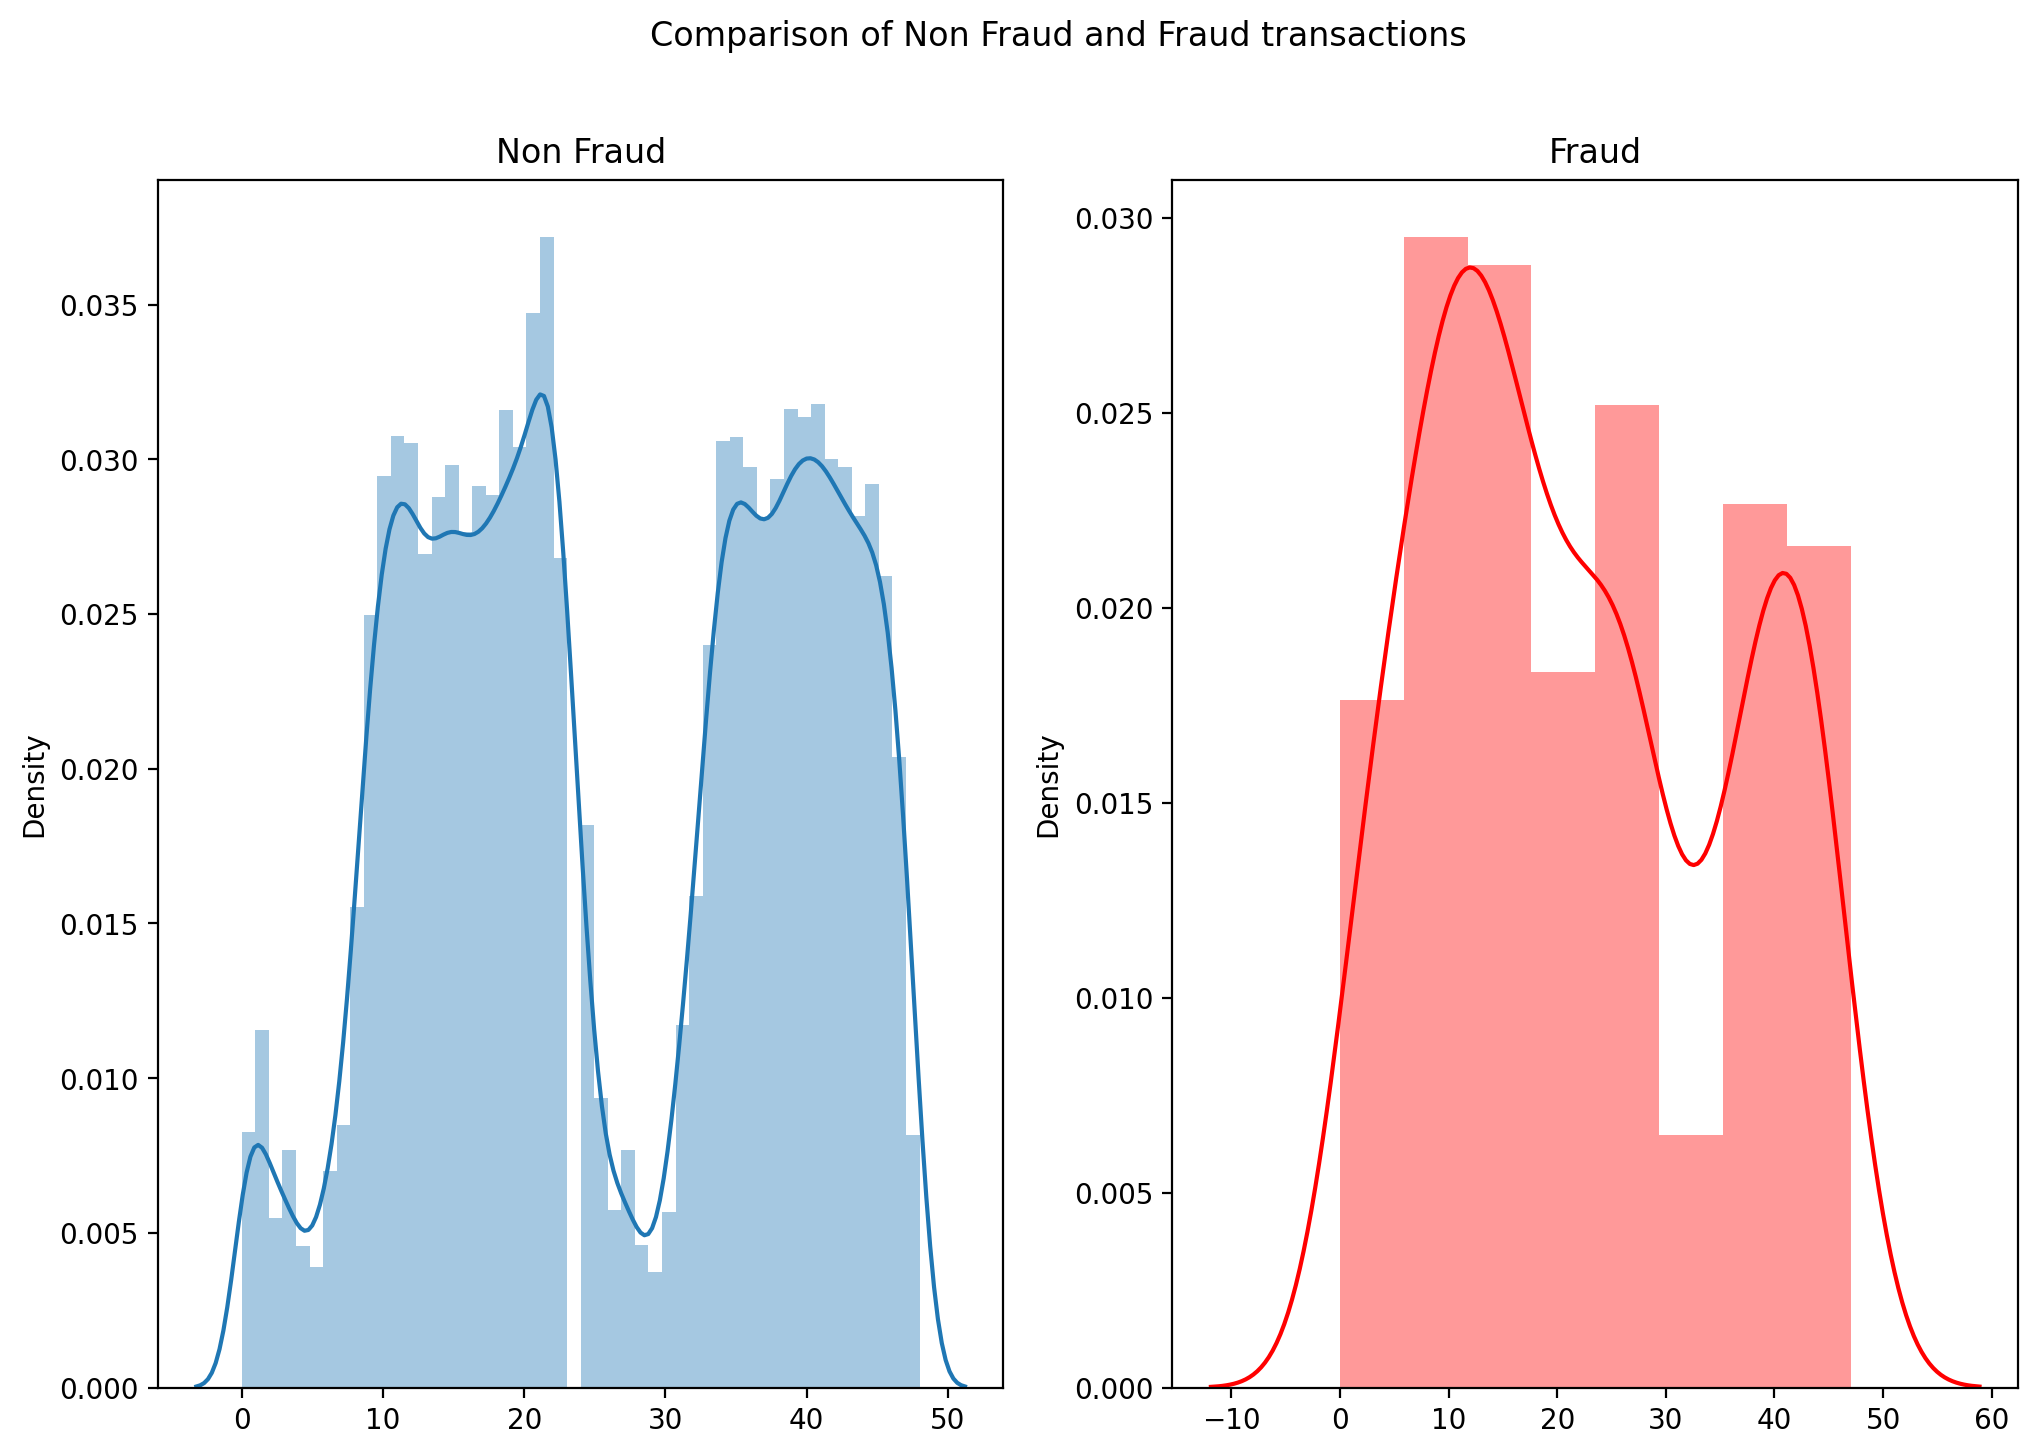

In [198]:
fig,axs = plt.subplots(nrows = 1,ncols = 2,figsize=(12,8),dpi=200)
sns.distplot(data[data['class']==0]['hrs'].values,ax=axs[0])
axs[0].set_title("Non Fraud")
sns.distplot(data[data['class']==1]['hrs'].values , color = 'red',ax=axs[1])
axs[1].set_title("Fraud")
plt.suptitle("Comparison of Non Fraud and Fraud transactions")
plt.show()

## Treatment of Outliers in the data

In [ ]:
## as the data of the variables are a result of principle component analysis so it is not advised to treat outliers
## from the components but we can have a treatment of outliers from the amount columns

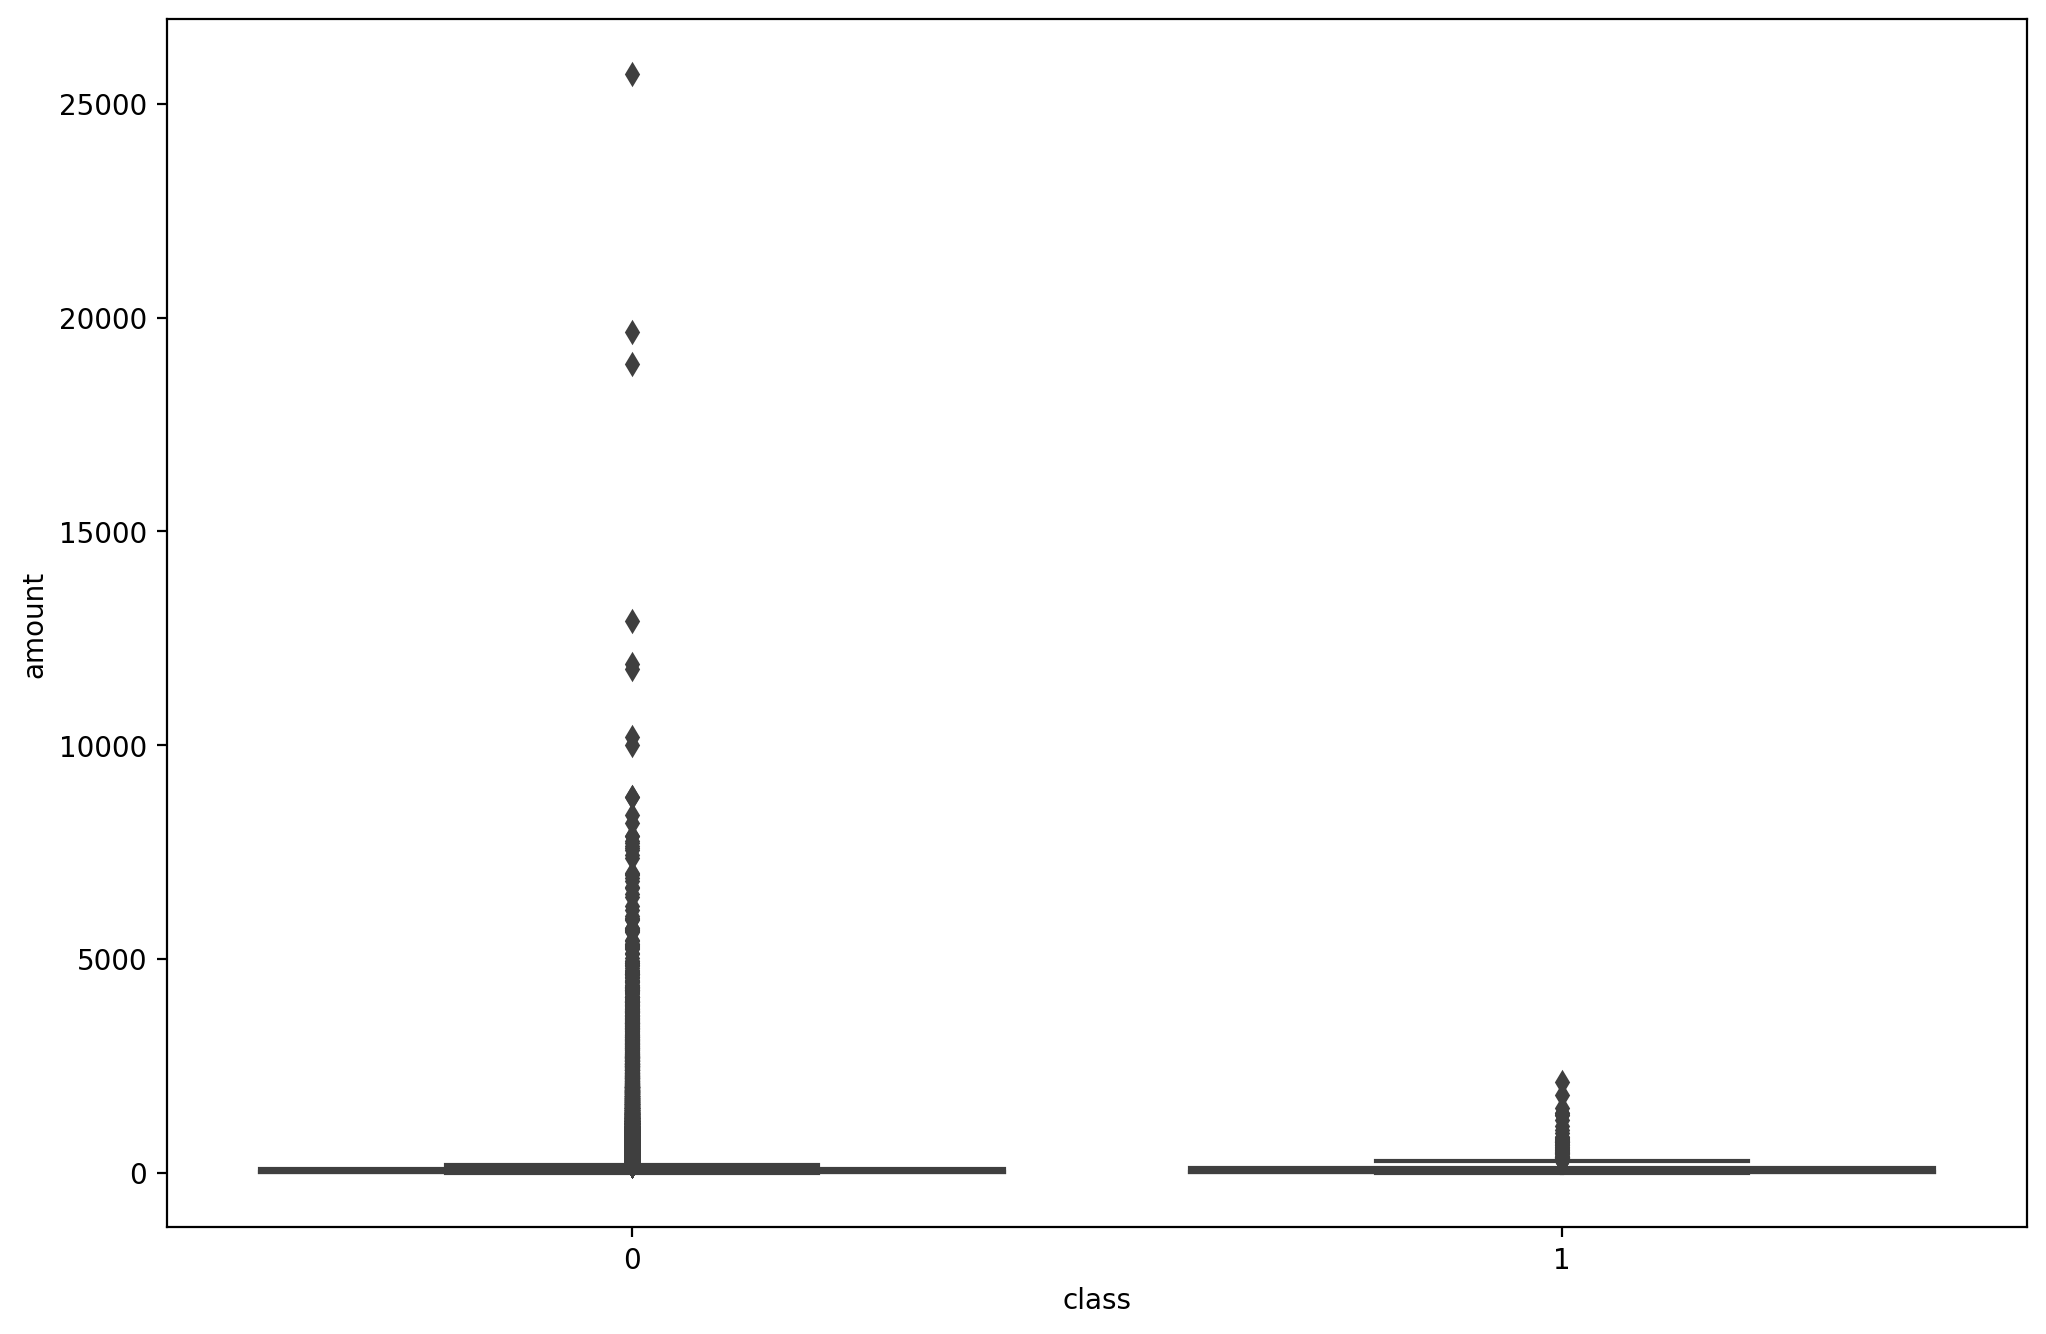

In [54]:
plt.figure(figsize=(12,8),dpi=200)
sns.boxplot(x='class',y="amount",data=data)
plt.show()

In [73]:
## creating a fucntion to remove outliers and tell the statistics...

def outliers(value):
    print("Total Outliers Values in the data: {}".format(len(data[data["amount"]>value]["amount"])))
    print("Proportion of data values lost: {}%".format(len(data[data["amount"]>3000]["amount"])/len(data["amount"])*100))
    print("Data lost from the class Non Fraud : {} number and {}%".format(len(data[(data["class"]==0) & (data["amount"]>value)]),len(data[(data["class"]==0) & (data["amount"]>value)])/len(data[data["class"]==0])))
    print("Data lost from the class Fraud : {} number and {}%".format(len(data[(data["class"]==1) & (data["amount"]>value)]),len(data[(data["class"]==1) & (data["amount"]>value)])/len(data[data["class"]==1])))
    temp_data=data[data["amount"]<value]
    print(temp_data["class"].value_counts(normalize=True))

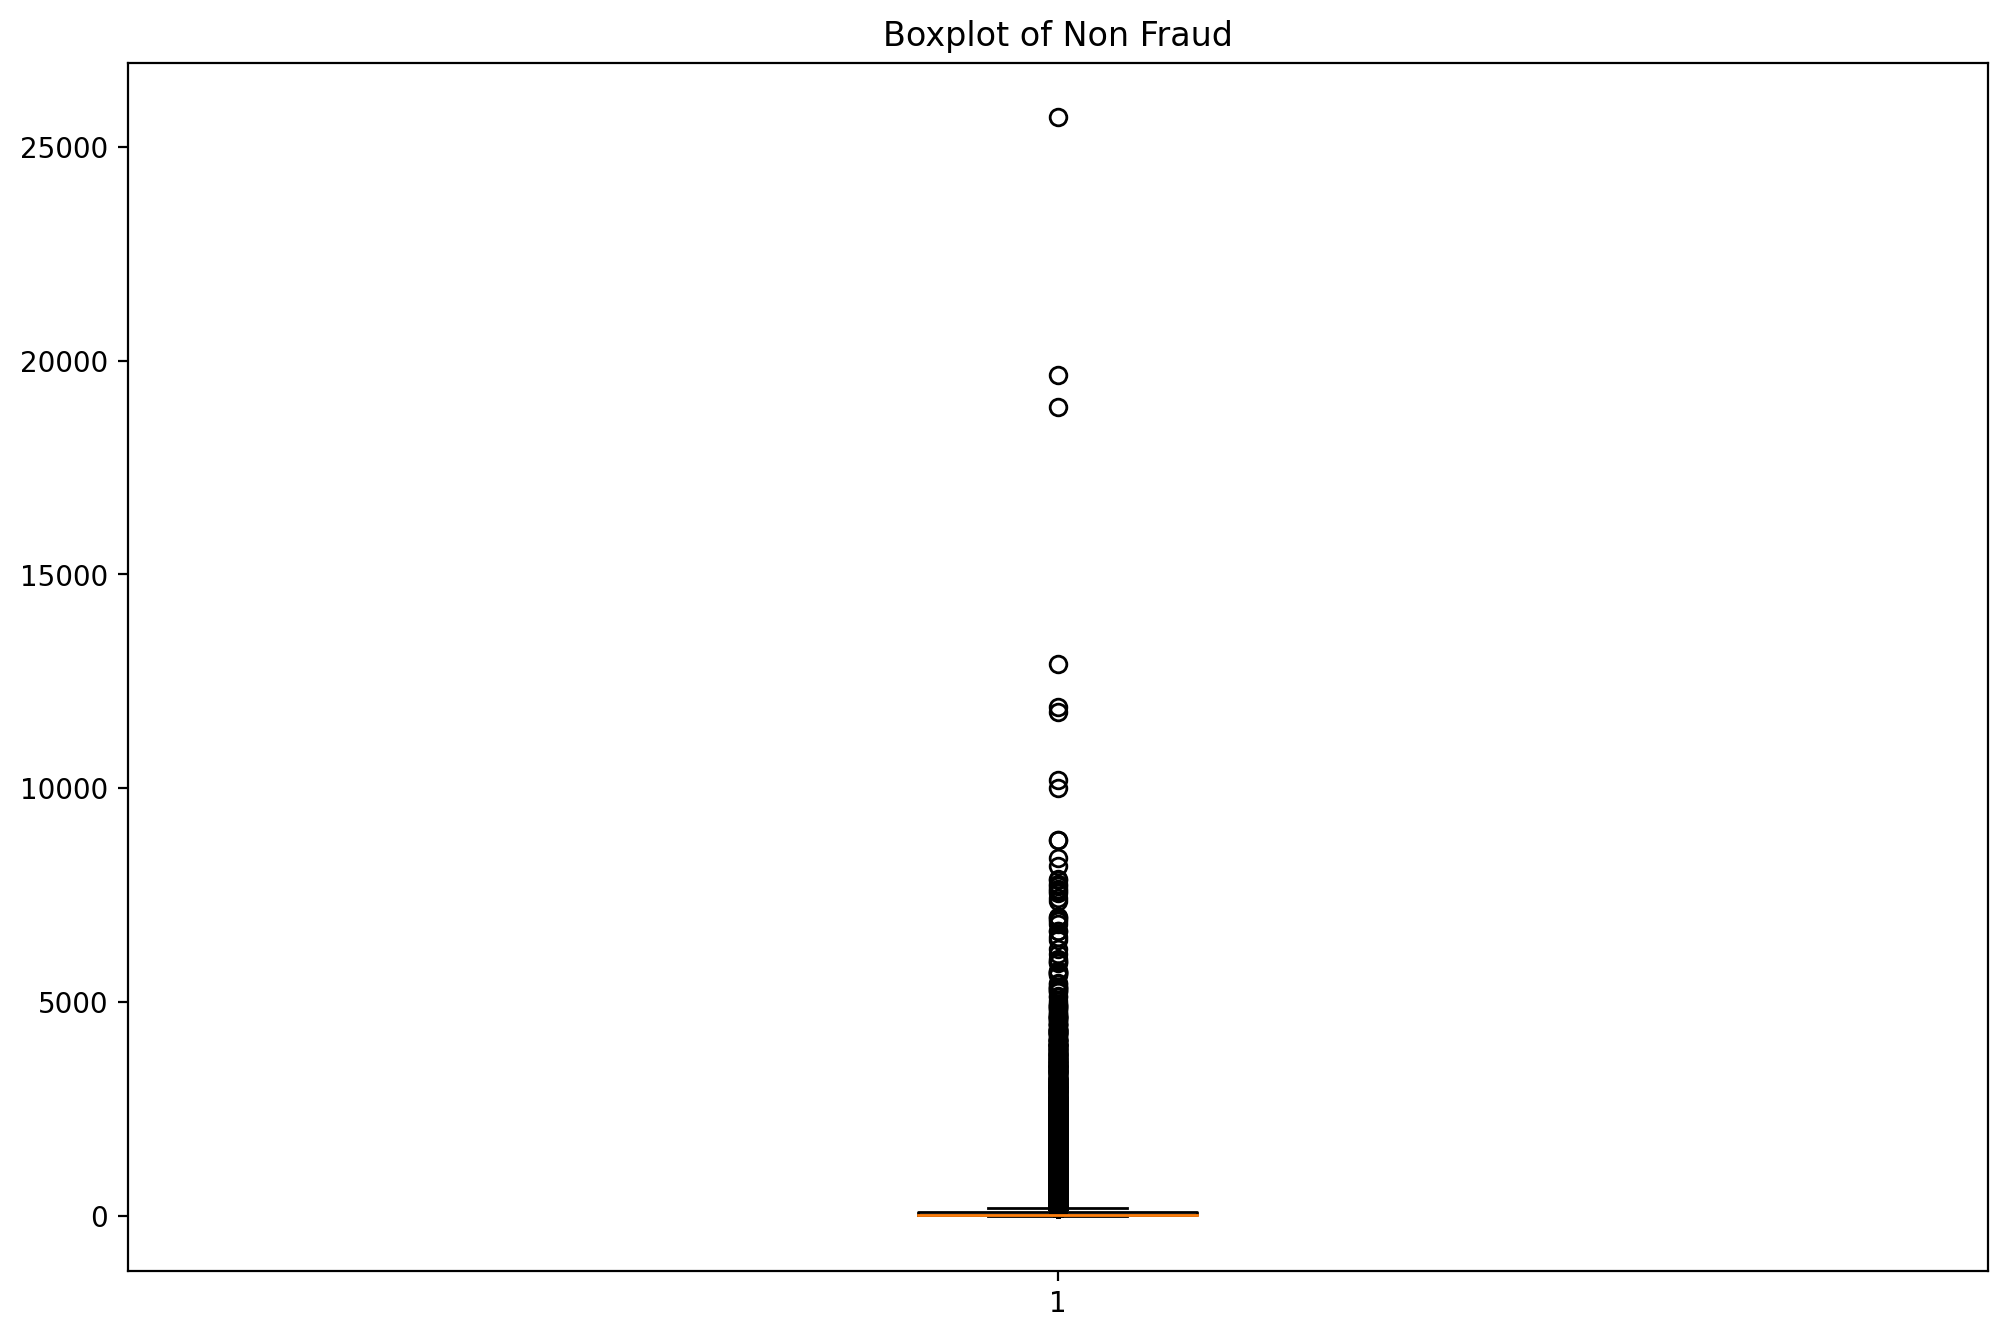

In [80]:
plt.figure(figsize=(12,8),dpi=200)
plt.boxplot(data[data["class"]==0]["amount"])
plt.title("Boxplot of Non Fraud")
plt.show()

#### as there is a huge imbalance in the dataset so mostly the removal of outliers would not affect the fraud class imbalance and we can remove the outliers for the mostly greater than 8000 

In [82]:
outliers(8000)     # also we can see proprtion of outliers is few so we can have drop of them

Total Outliers Values in the data: 12
Proportion of data values lost: 0.10009657204486018
Data lost from the class Non Fraud : 12 number and 4.236495288664198e-05%
Data lost from the class Fraud : 0 number and 0.0%
0    0.998333
1    0.001667
Name: class, dtype: float64


In [8]:
data=data[data["amount"]<8000]

In [115]:
data.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v22,v23,v24,v25,v26,v27,v28,amount,class,hrs
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


In [201]:
data[["class","amount"]].groupby(["class"]).agg({"amount":"mean"})    

,amount
class,
0,87.869462
1,123.871860


In [127]:
## this above gives an insight that the mean amount for fraud is high 
## also this should be the case as beacuse why the person at risk would do a risk for a small amount

In [213]:
data[["amount","dayhours","class"]].groupby(["dayhours","class"]).agg({"amount":"mean"})    


amount
dayhours class            
0        0       60.401362
         1      303.345000
1        0       62.612368
         1      127.932000
2        0       64.511442
         1       78.190833
3        0       51.947772
         1       13.759412
4        0       77.260541
         1       67.313043
5        0       50.413685
         1      128.788182
6        0       65.083241
         1      111.924444
7        0       67.719176
         1      119.903478
8        0       88.929820
         1       47.887778
9        0      102.217091
         1       78.463125
10       0      109.559501
         1      293.701250
11       0      109.185913
         1      123.976038
12       0      105.184132
         1      200.384706
13       0       97.662975
         1      129.087059
14       0      103.517626
         1      158.309565
15       0      101.782919
         1       85.926538
16       0      101.900481
         1      204.793182
17       0       98.327206
         1      120.425357
18       0       76.743630
         1      226.433571
19       0       77.789136
         1      111.296316
20       0       74.710770
         1       83.911667
21       0       71.908453
         1       64.343750
22       0       68.274202
         1      160.222222
23       0       68.052172
         1      139.879412

In [ ]:
### we can see that when the non fraud transactions tend to be low then fraud transactions tend be higher

<AxesSubplot:xlabel='hrs', ylabel='amount'>

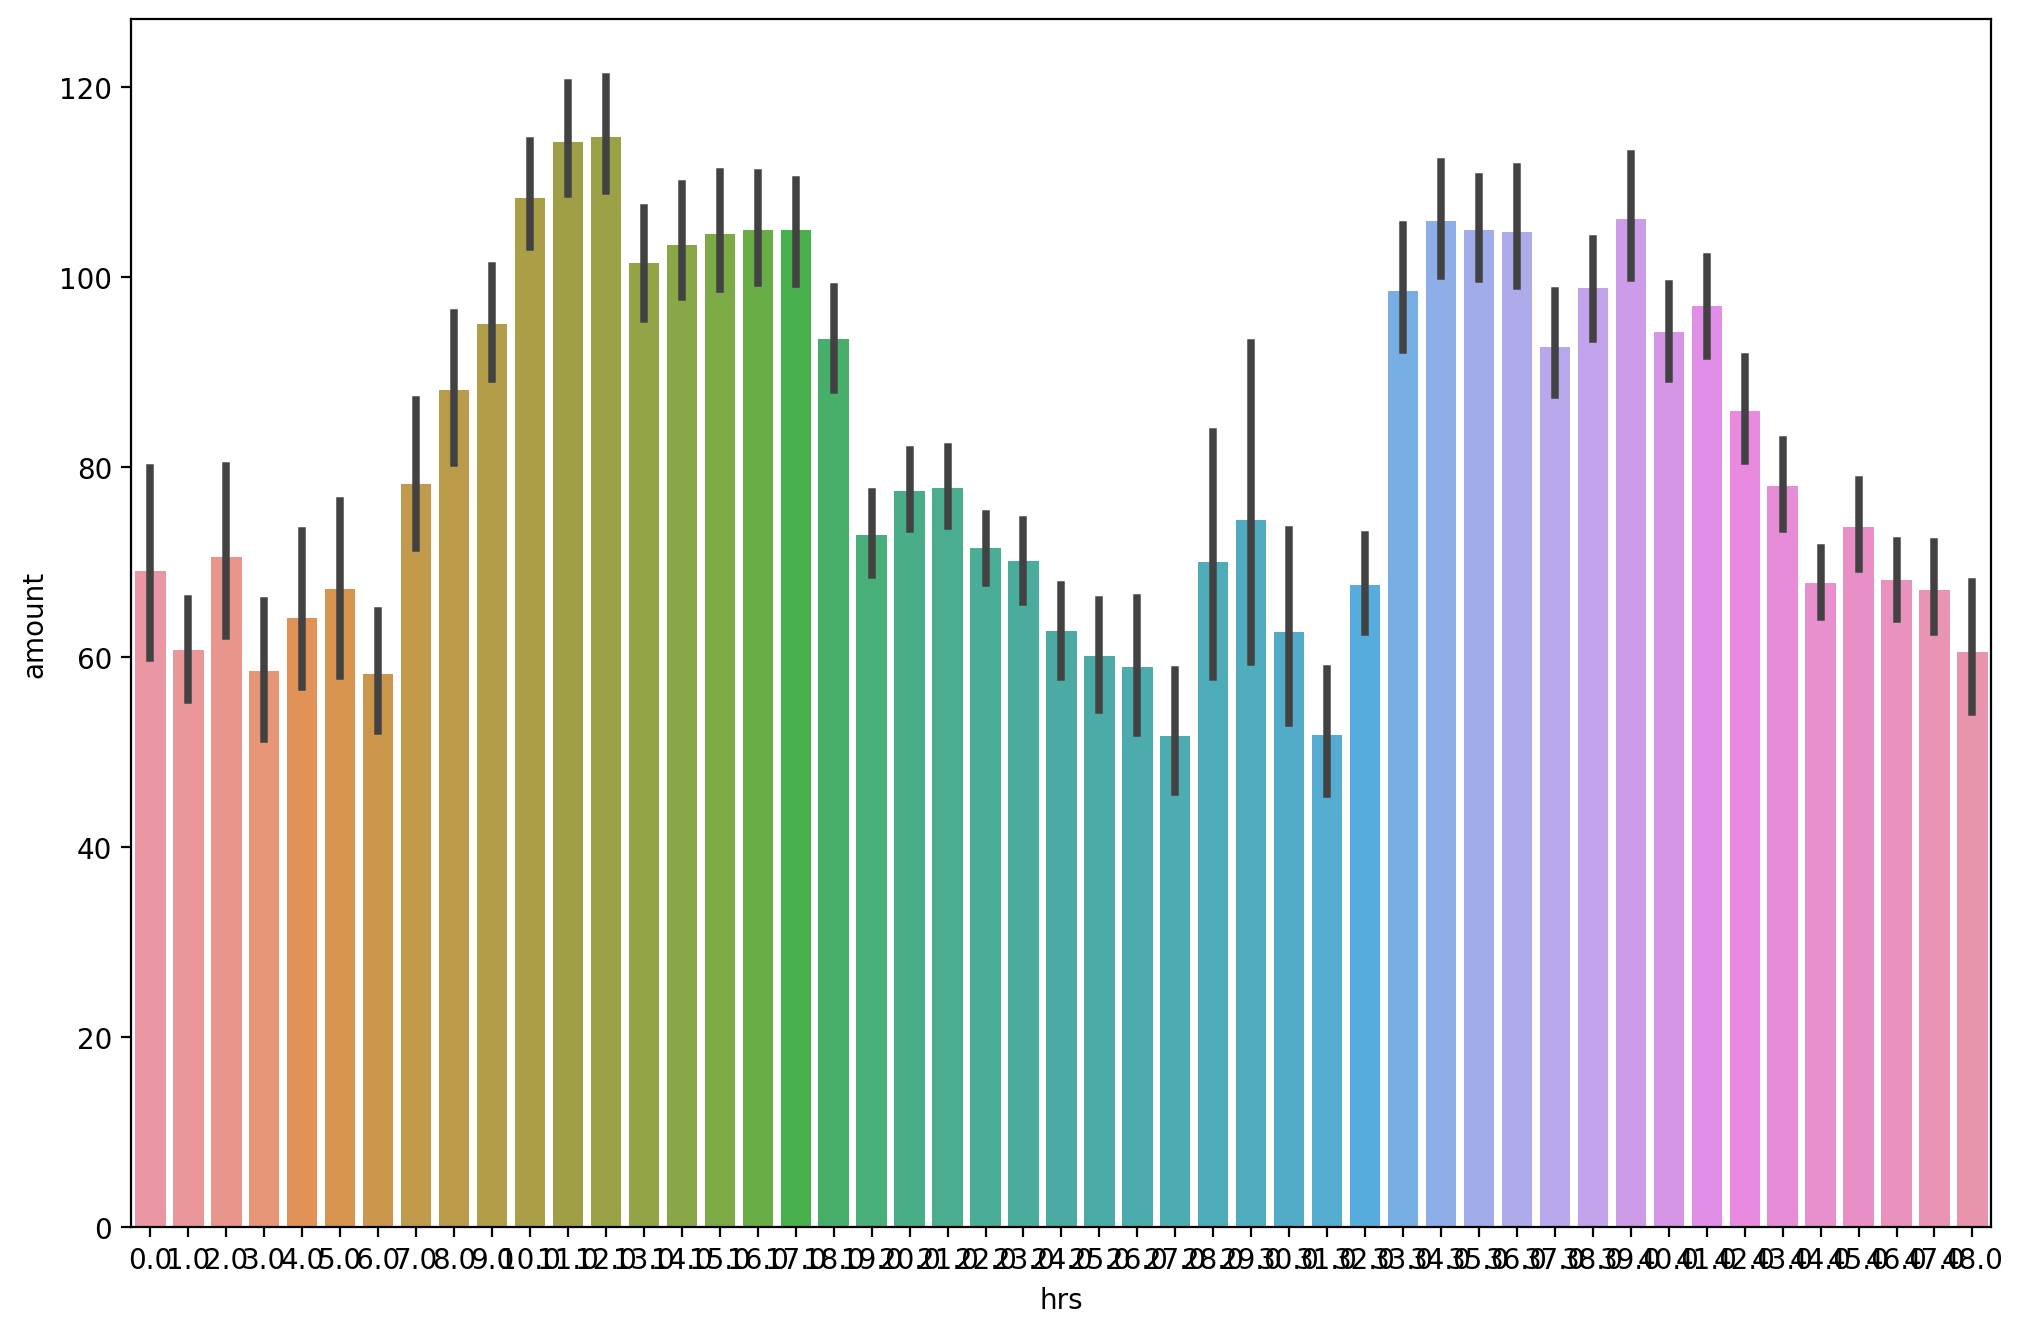

In [242]:
fig = plt.figure(figsize=(12,8),dpi =200)
sns.barplot(x="hrs",y="amount",data=data)
plt.show()

## we can see a pattern that is recurring that should also be there because we can have a pattern of increasing transactions in the morning or afternoon and then a decreasing or reduced transactions in the night

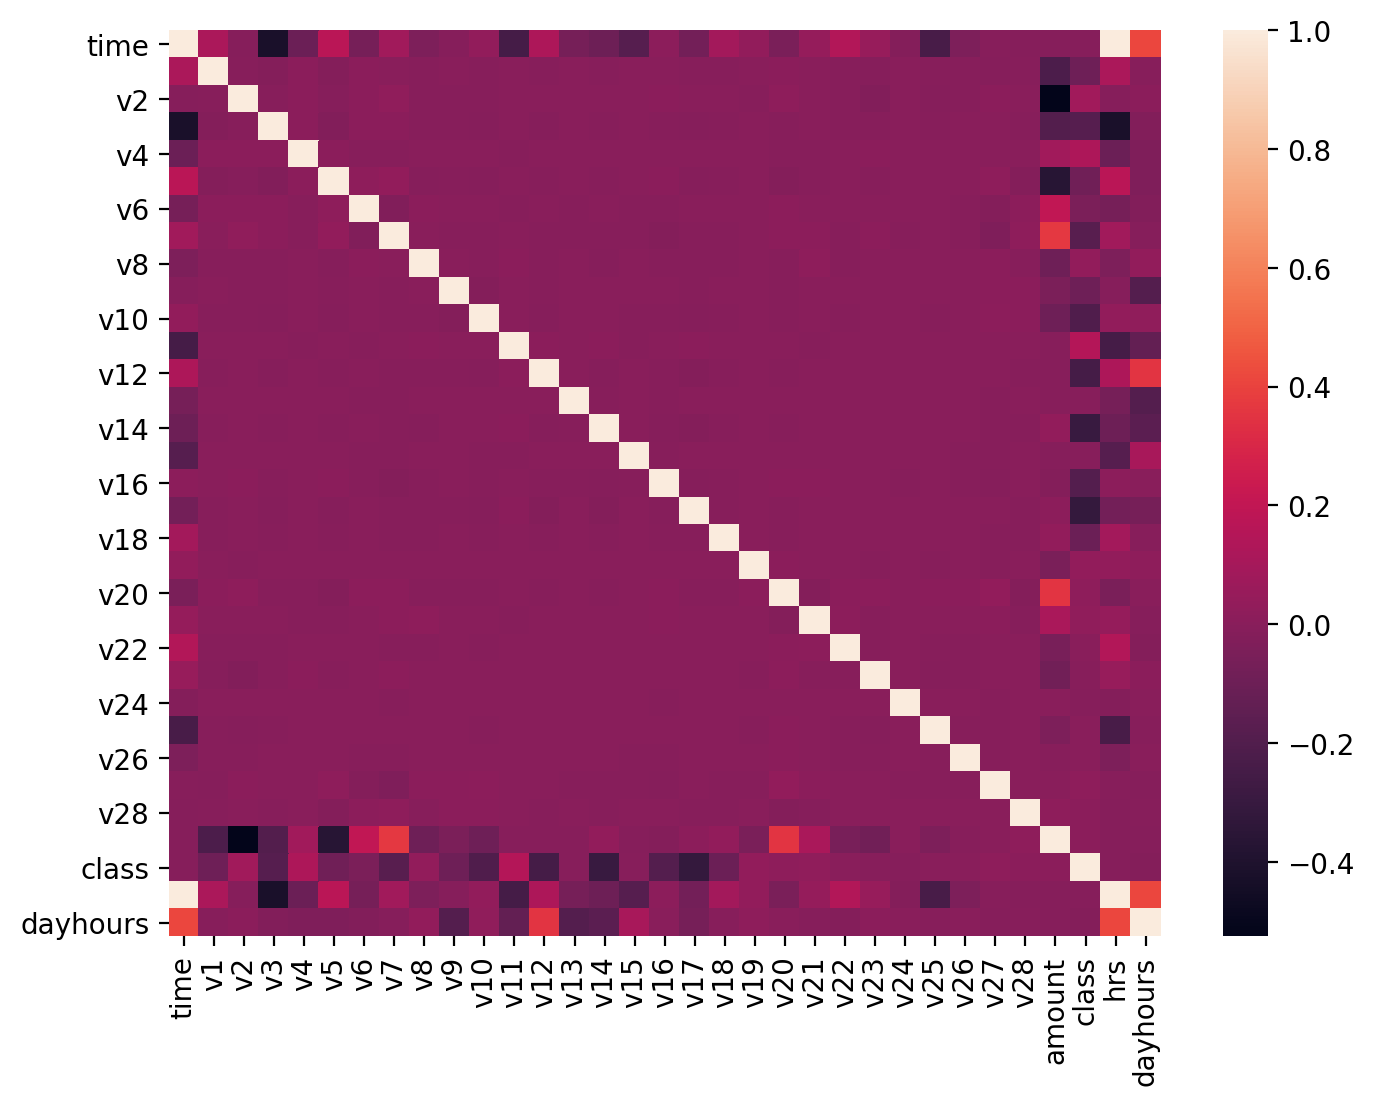

In [249]:
fig = plt.figure(figsize=(8,6),dpi =200)
sns.heatmap(data.corr())
plt.show() 

In [251]:
## no correlation and also we should not have that in first place as they are reduced from PCA variables

## Scaling of amount column (just to have a check for variable in the model)

In [9]:
scaler=StandardScaler()

In [10]:
data["scaled_amount"] = scaler.fit_transform(data["amount"].values.reshape(-1,1))

In [261]:
data.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v24,v25,v26,v27,v28,amount,class,hrs,dayhours,scaled_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0,0.264187
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,0,-0.365034
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,0,1.245040
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,0,0.152329
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,0,-0.076825


In [309]:
non_fraud_data=data[data["class"]==0].groupby(["dayhours"],as_index=False).agg({"amount":"count"})
fraud_data = data[data["class"]==1].groupby(["dayhours"],as_index=False).agg({"amount":"count"})

In [310]:
new_data=non_fraud_data[:]

In [311]:
new_data.rename(columns={"amount":"non_fraud_count"},inplace=True)
new_data["fraud_count"]=fraud_data["amount"]

In [316]:
new_data["ratio"]=new_data["fraud_count"]/new_data["non_fraud_count"]*100

In [317]:
new_data

,dayhours,non_fraud_count,fraud_count,ratio
0,0,7641,6,0.078524
1,1,4198,10,0.238209
2,2,3259,48,1.472844
3,3,3470,17,0.489914
4,4,2181,23,1.054562
5,5,2977,11,0.369499
6,6,4073,9,0.220967
7,7,7210,23,0.319001
8,8,10223,9,0.088037
9,9,15750,16,0.101587


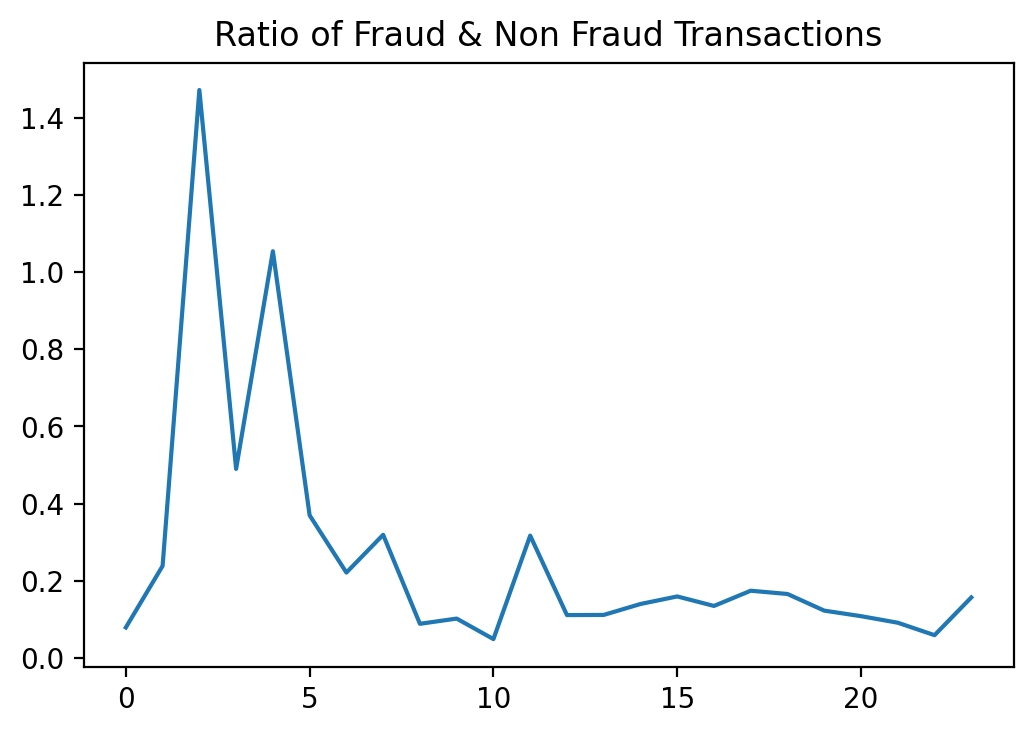

In [322]:
plt.figure(dpi=200)
plt.plot(new_data["dayhours"].values,new_data["ratio"].values)
plt.title("Ratio of Fraud & Non Fraud Transactions")
plt.show()


In [ ]:
## though based on the data as time is not given we can see that fraud transactions takes a 
## lot between the 0 to 7th dayhour

In [12]:
%pwd

'C:\\Users\\nikun\\OneDrive\\Desktop\\Python\\Projects\\1. Credit Card Fraud Detection'

In [13]:
data.to_csv("C:\\Users\\nikun\\OneDrive\\Desktop\\Python\\Projects\\1. Credit Card Fraud Detection\\exploreddata.csv")